In [1]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from skimage.io import imshow, imread
import glob
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = './dataset/ColorCars/Trains150150'
validation_data_dir = './dataset/ColorCars/Validations150150'

In [3]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='categorical')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=4,
        class_mode='categorical')


Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [4]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))
# model.add(Activation('relu'))
# model.add(Dense(1))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [5]:
nb_epoch = 30
nb_train_samples = 1600
nb_validation_samples = 400

In [6]:
k_history = model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)

Epoch 1/30
1600/1600 [==============================] - 7s - loss: 0.2911 - acc: 0.8581 - val_loss: 0.2669 - val_acc: 0.9050

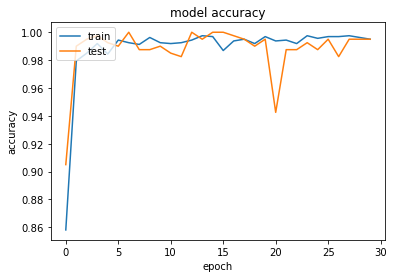

In [7]:
# summarize history for accuracy
plt.plot(k_history.history['acc'])
plt.plot(k_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

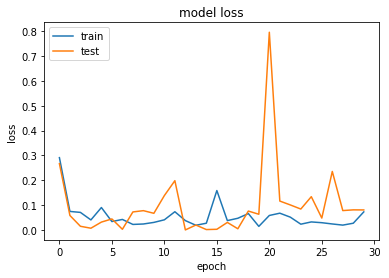

In [8]:
# summarize history for loss
plt.plot(k_history.history['loss'])
plt.plot(k_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
model.evaluate_generator(validation_generator, nb_validation_samples)

[0.080590601265452338, 0.995]

In [10]:
model.save_weights('models/color_softmax_car_cnn_30_epochs.h5')

In [11]:
from keras.preprocessing import image
from skimage.color import rgb2gray

In [12]:
img_list = ['./dataset/ColorCars/TrainResized_gray150150/08144.jpg',
            './dataset/ColorCars/TrainResized_gray150150/08143.jpg',
            './dataset/ColorCars/TrainResized_gray150150/08142.jpg',
            './dataset/ColorCars/TrainResized_gray150150/08141.jpg']
for ip in img_list:
    img = image.load_img(ip, target_size=(150,150))
    img = image.img_to_array(img)
    print(img.shape)
    img /= 255
    img = img.reshape((1,)+img.shape)
    print(model.predict_classes(img))

(150, 150, 3)
1/1 [==============================] - 0s
[1]
(150, 150, 3)
1/1 [==============================] - 0s
[1]
(150, 150, 3)
1/1 [==============================] - 0s
[1]
(150, 150, 3)
1/1 [==============================] - 0s
[1]


1/1 [==============================] - 0s
[0]
1/1 [==============================] - 0s
[0]
1/1 [==============================] - 0s
[0]
1/1 [==============================] - 0s
[0]


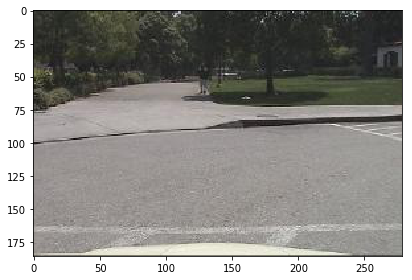

In [13]:
img_list = ['./dataset/ColorCars/BackgroundOrigins/image_1370.jpg',
            './dataset/ColorCars/BackgroundOrigins/image_1350.jpg',
            './dataset/ColorCars/BackgroundOrigins/image_1320.jpg',
            './dataset/ColorCars/BackgroundOrigins/image_1230.jpg']

# img_list = ['./dataset/ColorCars/BackgroundOrigins/image_0001.jpg',
#             './dataset/ColorCars/BackgroundOrigins/image_0002.jpg',
#             './dataset/ColorCars/BackgroundOrigins/image_0010.jpg',
#             './dataset/ColorCars/BackgroundOrigins/image_0033.jpg']


for ip in img_list:
    img = image.load_img(ip, target_size=(150,150))
    img = image.img_to_array(img)
    img /= 255
    img = img.reshape((1,)+img.shape)
    print(model.predict_classes(img))

imshow(img_list[0])